
---


#  🟢 Plota Série Temporal de Focos de Calor por Ano para o Brasil e o Estado de SP

---
**DADOS**:

 - Dados: Focos de calor do INPE na frequência anual - https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/EstadosBr_sat_ref/MG/



---
**REALIZAÇÃO**:


- Realizado por: Enrique V. Mattos - 04/09/2025
- E-mail: enrique@unifei.edu.br
- GitHub: https://github.com/evmpython
- Lattes: http://lattes.cnpq.br/8010078550088178



---

# **1° Passo:** Preparando ambiente

In [1]:
# instalações
!pip install -q ultraplot cartopy salem rasterio

# Bibliotecas para manipulação de arquivos e sistema
import glob                                 # Lista arquivos em diretórios usando padrões (ex: *.nc)
import time                                 # Medição de tempo de execução e operações relacionadas a tempo

# Bibliotecas para computação numérica e dados
import numpy as np                          # Operações matemáticas eficientes com arrays multidimensionais
import pandas as pd                         # Manipulação e análise de dados em estruturas tabulares (DataFrames)
import xarray as xr                         # Trabalho com arrays multidimensionais rotulados (comum em dados científicos)

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt             # Criação de gráficos e visualizações 2D/3D (biblioteca base)
import ultraplot as uplt                    # Visualização especializada para dados meteorológicos

# Bibliotecas para georreferenciamento e mapeamento
import cartopy                              # Ferramentas para criação de mapas e projeções cartográficas
import cartopy.crs as ccrs                  # Sistemas de referência de coordenadas para projeções de mapas
import cartopy.io.shapereader as shpreader  # Leitura de arquivos shapefile para mapas
import salem                                # Integração de dados geoespaciais com xarray

# Controle de avisos
import warnings                             # Gerenciamento de mensagens de alerta durante a execução
warnings.filterwarnings("ignore")           # Supressão de avisos para manter a saída limpa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.0 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/ultraplot/__init__.py:77: UltraPlotWarning: Rebuilding font cache. This usually happens after installing or updating ultraplot.
  register_fonts(default=True)


# **2° Passo:** Lendo os Dados do INPE

## Lendo os dados de 2003-2024
- São os dados por `ANO` do `Brasil` do satélite de referência `AQUA`. Demora 6min.

In [2]:
%%time
# cria uma tabela vazia
df_2003_a_2024 = pd.DataFrame()

# FTP dos dados anual do satélite AQUA
url = 'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/Brasil_sat_ref/'

# ano inicial e final: neste caso de 2003 a 2024
anoi, anof = '2003', '2025'

# loop dos meses
for ano in range(int(anoi), int(anof)):
    print(ano)

    # nome do arquivo
    filename = f'focos_br_ref_{str(ano)}.zip'

    # leitura da tabela: 2023
    df0 = pd.read_csv(f'{url}focos_br_ref_{str(ano)}.zip', compression='zip')

    # junta a tabela que foi lida com a anterior
    df_2003_a_2024 = pd.concat([df0, df_2003_a_2024], ignore_index=True)

# remove colunas
df_2003_a_2024.drop(['id_bdq','foco_id','pais'], axis=1, inplace=True)

# renomeia coluna
df_2003_a_2024.rename(columns={'data_pas': 'data'}, inplace=True)

# reposiciona as colunas
df_2003_a_2024 = df_2003_a_2024[['data','lat','lon','municipio','estado','bioma']]

# mostra o dataframe
df_2003_a_2024

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
CPU times: user 22.5 s, sys: 5.64 s, total: 28.2 s
Wall time: 6min 13s


,data,lat,lon,municipio,estado,bioma
0,2024-01-02 17:04:00,-15.89572,-38.89957,BELMONTE,BAHIA,Mata Atlântica
1,2024-01-02 17:06:00,-7.49188,-38.88316,BREJO SANTO,CEARÁ,Caatinga
2,2024-01-02 17:06:00,-6.50564,-39.44122,CARIÚS,CEARÁ,Caatinga
3,2024-01-02 17:06:00,-6.50409,-39.43422,CARIÚS,CEARÁ,Caatinga
4,2024-01-02 17:06:00,-5.74166,-39.59352,MOMBAÇA,CEARÁ,Caatinga
...,...,...,...,...,...,...
5107968,2003-09-26 16:30:00,-11.71700,-49.33000,DUERÉ,TOCANTINS,Cerrado
5107969,2003-09-26 18:08:00,-13.65700,-57.39400,DIAMANTINO,MATO GROSSO,Cerrado
5107970,2003-10-07 16:13:00,-5.87600,-44.64400,TUNTUM,MARANHÃO,Cerrado
5107971,2003-10-09 17:37:00,-12.27900,-60.48900,VILHENA,RONDÔNIA,Amazônia


## Lendo os dados de 2025
- São os dados por `MÊS` do `Brasil` de `TODOS` satélites.

In [3]:
%%time
# cria uma tabela
df_2025 = pd.DataFrame()

# FTP dos dados mensal de 2025 do satélite AQUA
url = 'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/mensal/Brasil/'

# loop dos meses de 2025, até o mês 09
for data in pd.date_range('20250101','20251101', freq='1M'):

    # extrai ano e mês
    ano = data.strftime('%Y')
    mes = data.strftime('%m')
    print(ano, mes)

    # nome do arquivo
    filename = f'focos_mensal_br_{ano}{mes}.csv'

    # leitura da tabela
    df0 = pd.read_csv(f'{url}{filename}')

    # junta a tabela que foi lida com a anterior
    df_2025 = pd.concat([df_2025, df0], ignore_index=True)

# seleciona apenas para MG e para o satélite de referência AQUA_M-T
#df_2025 = df_2025[ (df_2025['estado']=='MINAS GERAIS') & (df_2025['satelite']=='AQUA_M-T') ]
df_2025 = df_2025[ df_2025['satelite'] == 'AQUA_M-T' ]

# renomeia coluna
df_2025.rename(columns={'data_hora_gmt': 'data'}, inplace=True)

# reposiciona as colunas
df_2025 = df_2025[['data','lat','lon','municipio','estado','bioma']]

# mostra tabela
df_2025

2025 01
2025 02
2025 03
2025 04
2025 05
2025 06
2025 07
2025 08
2025 09
2025 10
CPU times: user 9.49 s, sys: 3.02 s, total: 12.5 s
Wall time: 14min 54s


,data,lat,lon,municipio,estado,bioma
1419,2025-01-01 16:52:00,-8.70136,-36.58537,CAPOEIRAS,PERNAMBUCO,Caatinga
1420,2025-01-01 16:52:00,-7.25636,-38.53855,BONITO DE SANTA FÉ,PARAÍBA,Caatinga
1421,2025-01-01 16:52:00,-7.60073,-37.72230,SOLIDÃO,PERNAMBUCO,Caatinga
1422,2025-01-01 16:52:00,-12.31578,-37.87934,ENTRE RIOS,BAHIA,Mata Atlântica
1423,2025-01-01 16:52:00,-12.30725,-37.89272,ENTRE RIOS,BAHIA,Mata Atlântica
...,...,...,...,...,...,...
2216011,2025-10-02 19:49:00,-7.83143,-71.93813,TARAUACÁ,ACRE,Amazônia
2216012,2025-10-02 19:49:00,-7.66119,-72.28210,CRUZEIRO DO SUL,ACRE,Amazônia
2216013,2025-10-02 19:49:00,-7.85048,-72.31348,CRUZEIRO DO SUL,ACRE,Amazônia
2216014,2025-10-02 19:49:00,-7.89673,-71.69649,TARAUACÁ,ACRE,Amazônia


## Junta os dados de 2003-2024 com 2025

In [4]:
# junta os dataframes
df = pd.concat([df_2003_a_2024, df_2025], ignore_index=True)

# transforma a coluna "datahora" para o formato "datetime"
df['data'] = pd.to_datetime(df['data'])

# seta a coluna "datahora" como o índice da tabela
df.set_index('data', inplace=True)

# ordena a tabela pelo índice
df.sort_index(inplace=True)

# mostra o dataframe final
df

,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-01 16:04:00,-15.62100,-41.66500,BERIZAL,MINAS GERAIS,Mata Atlântica
2003-01-01 16:04:00,-14.82900,-40.13300,NOVA CANAÃ,BAHIA,Mata Atlântica
2003-01-01 16:04:00,-15.27600,-41.51400,TREMEDAL,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-10.84500,-37.92200,SIMÃO DIAS,SERGIPE,Caatinga
2003-01-01 16:05:00,-10.67500,-37.03400,ROSÁRIO DO CATETE,SERGIPE,Mata Atlântica
...,...,...,...,...,...
2025-10-02 19:49:00,-8.61867,-70.51947,FEIJÓ,ACRE,Amazônia
2025-10-02 19:49:00,-7.83143,-71.93813,TARAUACÁ,ACRE,Amazônia
2025-10-02 19:49:00,-7.66119,-72.28210,CRUZEIRO DO SUL,ACRE,Amazônia


In [9]:
# Seleciona apenas linhas onde o mês está entre 1 (janeiro) e 9 (setembro)
df_filtrado = df.loc[(df.index.month >= 1) & (df.index.month <= 9)]

print(f"DataFrame original: {len(df)} linhas")
print(f"DataFrame filtrado: {len(df_filtrado)} linhas")
print(f"Período: {df_filtrado.index.min()} a {df_filtrado.index.max()}")

DataFrame original: 5186997 linhas
DataFrame filtrado: 3550580 linhas
Período: 2003-01-01 16:04:00 a 2025-09-30 18:34:00


In [13]:
df_filtrado[0:50]

,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-01 16:04:00,-15.621,-41.665,BERIZAL,MINAS GERAIS,Mata Atlântica
2003-01-01 16:04:00,-14.829,-40.133,NOVA CANAÃ,BAHIA,Mata Atlântica
2003-01-01 16:04:00,-15.276,-41.514,TREMEDAL,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-10.845,-37.922,SIMÃO DIAS,SERGIPE,Caatinga
2003-01-01 16:05:00,-10.675,-37.034,ROSÁRIO DO CATETE,SERGIPE,Mata Atlântica
2003-01-01 16:05:00,-10.111,-36.505,IGREJA NOVA,ALAGOAS,Caatinga
2003-01-01 16:05:00,-11.886,-37.815,ESPLANADA,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-11.879,-37.812,ESPLANADA,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-12.667,-38.267,CAMAÇARI,BAHIA,Mata Atlântica


# **3° Passo:** Agrupa os Focos de Calor por Ano

In [14]:
# Calculando a anual total - BR
anual_br = df_filtrado.groupby(pd.Grouper(freq='1Y')).count()['lat']

# Calculando a anual total - SP
# seleciona os focos para um determinado Estado
df_total_sp = df_filtrado[ df_filtrado['estado'] == 'SÃO PAULO' ]

# calculando a anual total
anual_sp = df_total_sp.groupby(pd.Grouper(freq='1Y')).count()['lat']

In [15]:
# mostra os dados agrupados por ano para o Brasil
anual_br

,lat
data,
2003-12-31,225341
2004-12-31,252150
2005-12-31,251577
2006-12-31,172420
2007-12-31,282946
2008-12-31,114997
2009-12-31,82217
2010-12-31,246729
2011-12-31,102829


In [16]:
# mostra os dados agrupados por ano para o Estado de São Paulo
anual_sp

,lat
data,
2003-12-31,4837
2004-12-31,3689
2005-12-31,3272
2006-12-31,4870
2007-12-31,3650
2008-12-31,2440
2009-12-31,1529
2010-12-31,6739
2011-12-31,3759


# **4° Passo:** Plota Figura

In [47]:
df_filtrado.iloc[0].name

Timestamp('2003-01-01 16:04:00')

In [ ]:
df_filtrado.iloc[0].name.strftime('%Y-%m-%d')
df_filtrado.iloc[-1].name.strftime('%Y-%m-%d')

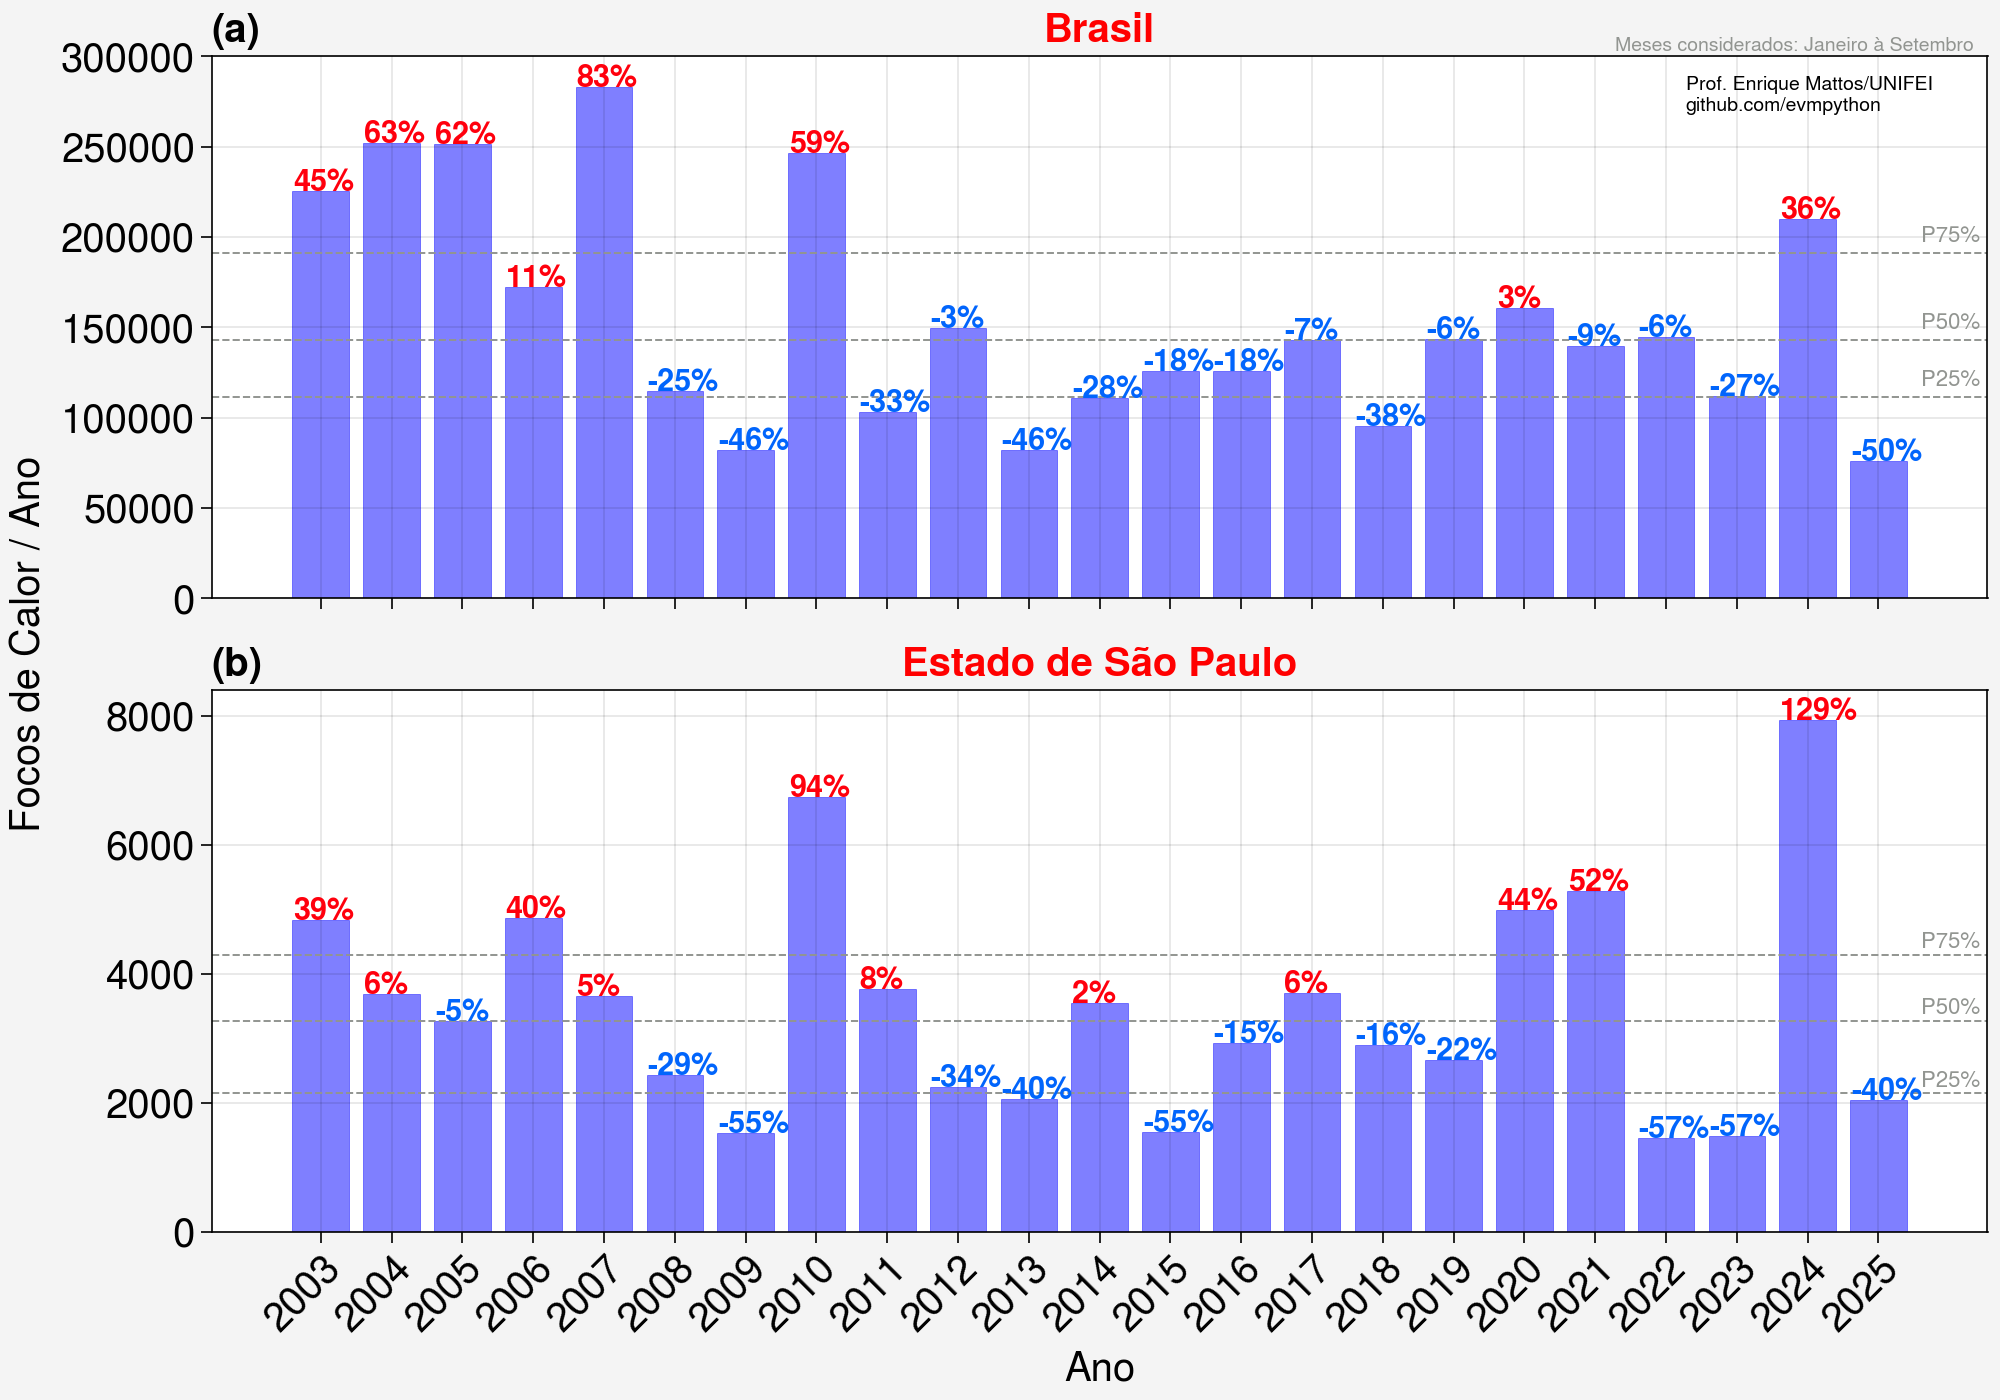

In [52]:
#===================================================================================#
#                            PLOTA GRÁFICO
#===================================================================================#
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(10,7), tight=True, ncols=1, nrows=2, abc=True, abcstyle='(a)', abcsize=5)

#-------------------------------#
#           BRASIL
#-------------------------------#
# gráfico
ax[0].bar(anual_br.index.year,
          anual_br.values,
          color='blue',
          alpha=0.5)

# data inicial e final
di = df_filtrado.iloc[0].name.strftime('%Y-%m-%d')
df = df_filtrado.iloc[-1].name.strftime('%Y-%m-%d')

# Coordenadas em fração do eixo (0,0 = canto inferior esquerdo, 1,1 = canto superior direito)
ax[0].annotate(f'Meses considerados: Janeiro à Setembro',
               xy=(0.79, 1.01),               # 2% da esquerda, 95% do topo
               xycoords='axes fraction',     # coordenadas relativas ao eixo
               fontsize=7,
               color='gray',
               ha='left')                    # alinhamento horizontal

# insere os valores de anomalia no topo das barras
anomalias_br = ((anual_br.values - np.mean(anual_br.values)) / np.mean(anual_br.values)) * 100.

for ano_br, focos_br, anomalia_br in zip(anual_br.index.year, anual_br.values, anomalias_br):
    val_br = f'{str(int(anomalia_br))}%'
    if anomalia_br > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax[0].text(ano_br-0.39, focos_br, val_br, color=cor, fontsize=11, weight='bold')

# formatação do eixo
ax[0].format(title='Brasil',
             titleloc='c',
             titleweight='bold',
             titlecolor='red',
             xlabel='Ano',
             ylabel='Focos de Calor / Ano',
             small='20px',
             large='20px',
             xtickminor=False,
             ytickminor=False,
             xticks=uplt.arange(2003,2025,1),
             xrotation=45,
             ylim=(0,300000))

# plota percentil de 25%, 50%, 75%
p25 = np.percentile(anual_br.values, 25)
p50 = np.percentile(anual_br.values, 50)
p75 = np.percentile(anual_br.values, 75)
ax[0].axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax[0].axhline(p50, color='gray', linestyle='--', lw=0.7, label='P50%')
ax[0].axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax[0].text(2025.6, p25+6000, 'P25%', color='gray', fontsize=8)
ax[0].text(2025.6, p50+6000, 'P50%', color='gray', fontsize=8)
ax[0].text(2025.6, p75+6000, 'P75%', color='gray', fontsize=8)

# informação na figura
ax[0].annotate('Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', xy=(0.83, 0.90), fontsize=7, color='black', xycoords='axes fraction')

#-------------------------------#
#         SÃO PAULO
#-------------------------------#
# gráfico
ax[1].bar(anual_sp.index.year,
          anual_sp.values,
          color='blue',
          alpha=0.5)

# insere os valores de anomalia no topo das barras
anomalias_sp = ((anual_sp.values - np.mean(anual_sp.values)) / np.mean(anual_sp.values)) * 100.
for ano_sp, focos_sp, anomalia_sp in zip(anual_sp.index.year, anual_sp.values, anomalias_sp):
    val_sp = f'{str(int(anomalia_sp))}%'
    if anomalia_sp > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax[1].text(ano_sp-0.39, focos_sp, val_sp, color=cor, fontsize=11, weight='bold')

# formatação do eixo
ax[1].format(title='Estado de São Paulo',
             titleloc='c',
             titleweight='bold',
             titlecolor='red',
             xlabel='Ano',
             ylabel=' Focos de Calor / Ano',
             small='20px',
             large='20px',
             xtickminor=False,
             ytickminor=False,
             xticks=uplt.arange(2003,2025,1),
             xrotation=45, ylim=(0,8400))

# plota percentil de 25%, 50%, 75%
p25 = np.percentile(anual_sp.values, 25)
p50 = np.percentile(anual_sp.values, 50)
p75 = np.percentile(anual_sp.values, 75)
ax[1].axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax[1].axhline(p50, color='gray', linestyle='--', lw=0.7, label='P50%')
ax[1].axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax[1].text(2025.6, p25+100, 'P25%', color='gray', fontsize=8)
ax[1].text(2025.6, p50+100, 'P50%', color='gray', fontsize=8)
ax[1].text(2025.6, p75+100, 'P75%', color='gray', fontsize=8)
#-------------------------------#

# salva figura
fig.save('13_serie_temporal_anual_jan_a_set_brasil_e_SP.jpg', dpi=300)

# exibe figura na tela
uplt.show()